# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
data = pd.read_csv('Olympics 2024.csv')

In [3]:
data.head()

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1


## Checking if data is missing

In [4]:
data.isna().sum()

Competitions    0
Rank            0
NOC             0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

## Info about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Competitions  454 non-null    object
 1   Rank          454 non-null    object
 2   NOC           454 non-null    object
 3   Gold          454 non-null    int64 
 4   Silver        454 non-null    int64 
 5   Bronze        454 non-null    int64 
 6   Total         454 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 25.0+ KB


In [6]:
data.describe()

,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000


## Overview of the data

In [7]:
print("Total Competitions:", data['Competitions'].nunique())
print("Total Countries:", data['NOC'].nunique())
print("Total Medals (Gold, Silver, Bronze):", data[['Gold', 'Silver', 'Bronze']].sum().sum())

Total Competitions: 35
Total Countries: 93
Total Medals (Gold, Silver, Bronze): 1044


## Top 10 Countries by Total Medals

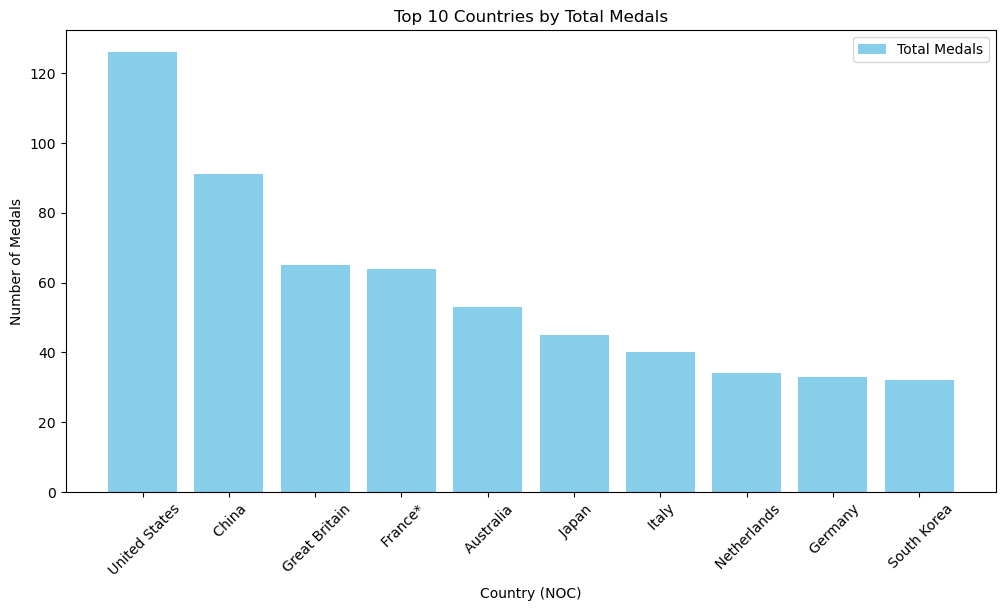

In [8]:
medals_by_country = data.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum().reset_index()
medals_by_country['Total'] = medals_by_country[['Gold', 'Silver', 'Bronze']].sum(axis=1)

top_countries = medals_by_country.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['NOC'], top_countries['Total'], color='skyblue', label='Total Medals')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')
plt.title('Top 10 Countries by Total Medals')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries by Gold Medals

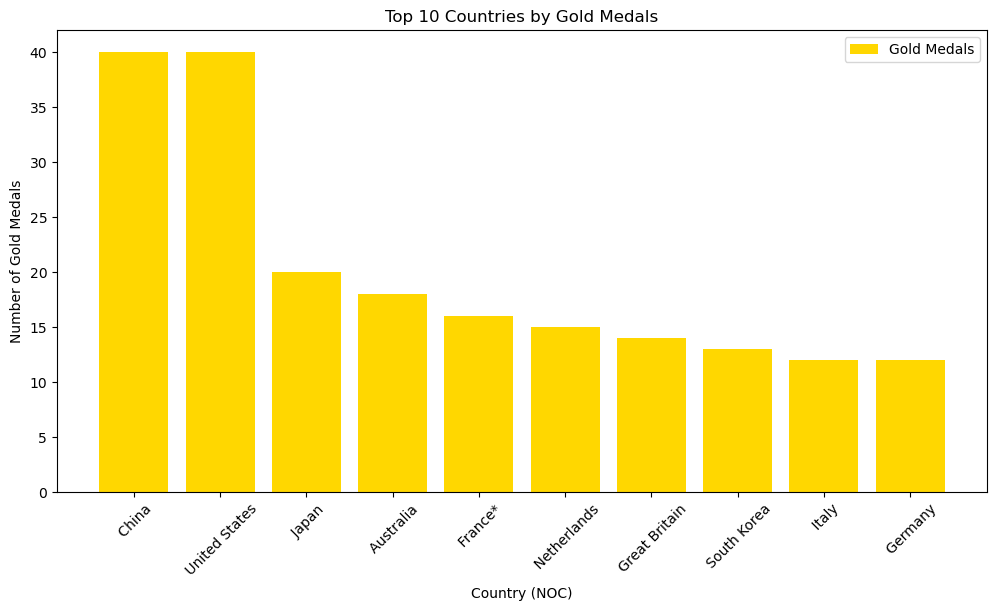

In [9]:
medals_by_country['Total'] = medals_by_country[['Gold']].sum(axis=1)

top_countries = medals_by_country.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['NOC'], top_countries['Total'], color='gold', label='Gold Medals')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Gold Medals')
plt.title('Top 10 Countries by Gold Medals')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries by Silver Medals

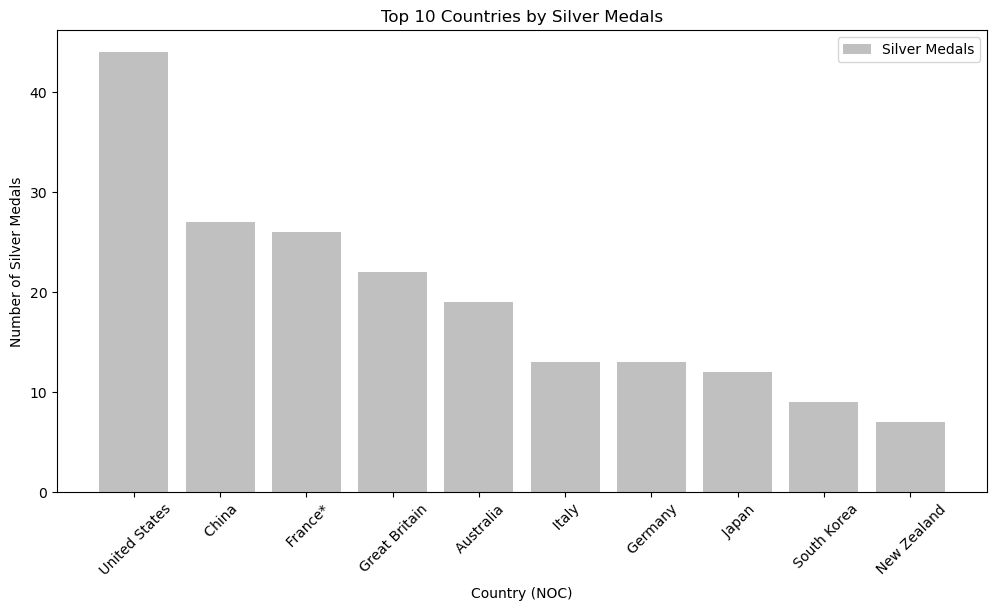

In [10]:
medals_by_country['Total'] = medals_by_country[['Silver']].sum(axis=1)

top_countries = medals_by_country.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['NOC'], top_countries['Total'], color='silver', label='Silver Medals')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Silver Medals')
plt.title('Top 10 Countries by Silver Medals')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries by Bronze Medals

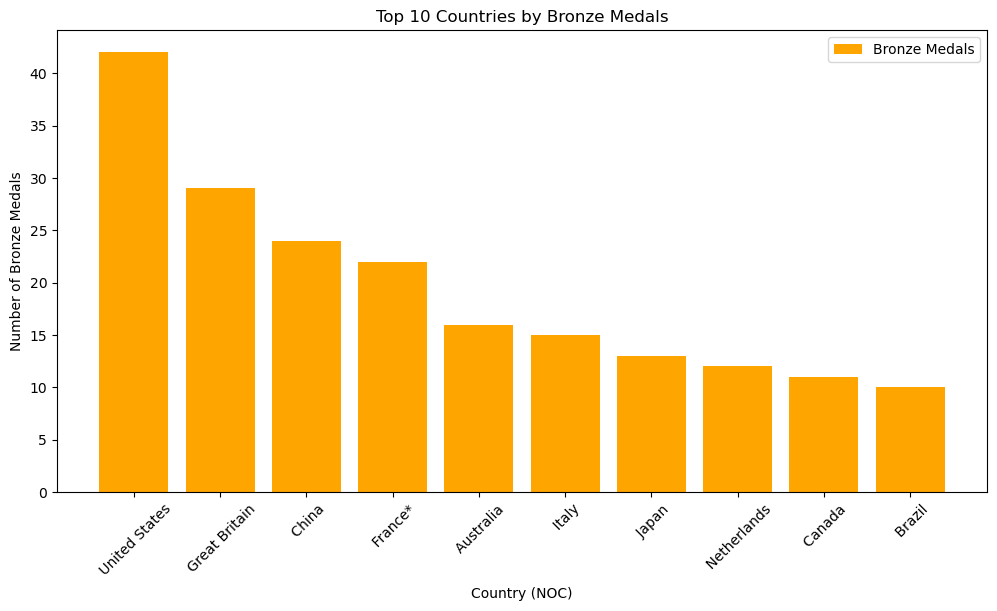

In [11]:
medals_by_country['Total'] = medals_by_country[['Bronze']].sum(axis=1)

top_countries = medals_by_country.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['NOC'], top_countries['Total'], color='orange', label='Bronze Medals')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Bronze Medals')
plt.title('Top 10 Countries by Bronze Medals')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Medal Type Comparison for Top Countries

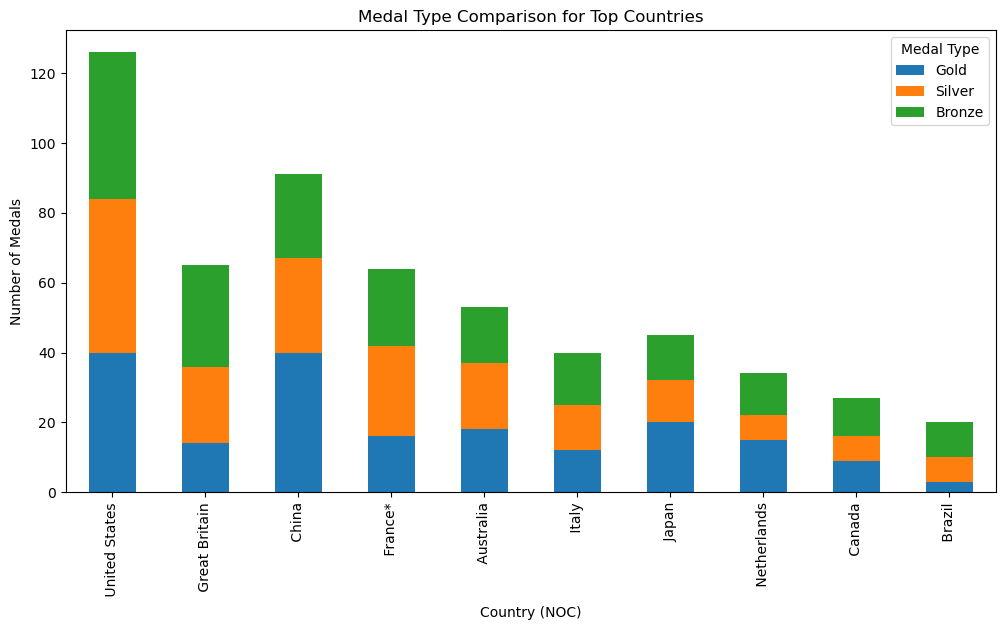

In [12]:
top_countries = medals_by_country.nlargest(10, 'Total')
top_countries.set_index('NOC')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Medal Type Comparison for Top Countries')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()

## Distribution of Ranks

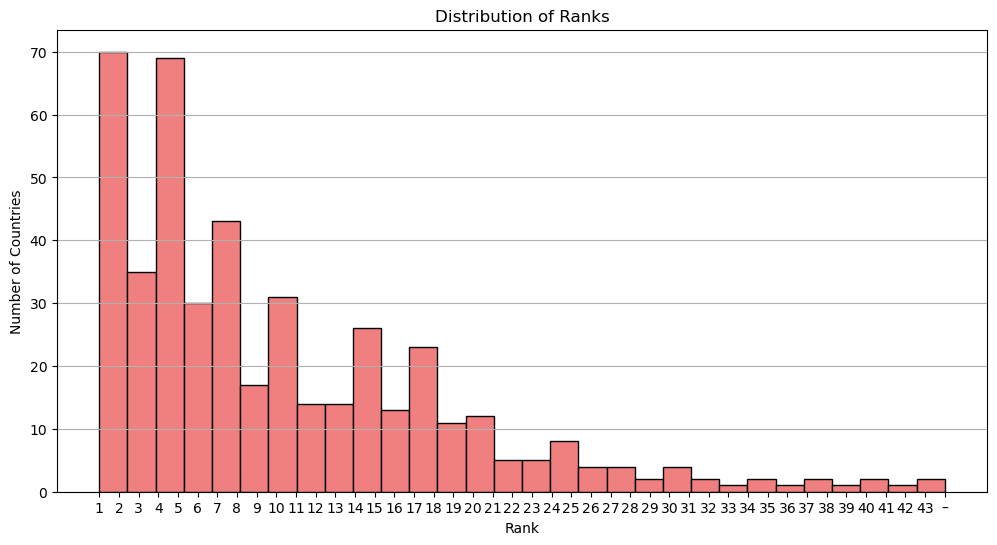

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(data['Rank'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Ranks')
plt.xlabel('Rank')
plt.ylabel('Number of Countries')
plt.grid(axis='y')
plt.show()